In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import random
from sklearn.svm import SVC

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
def read_data(filename):
    data = []
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader) # take the header out
        for row in reader: # each row is a list
            data.append(row)
    data  = np.array(data, dtype = np.float)
    X = data[:,:-1]
    y = data[:,-1]
    
    return X, y

In [3]:
trainx, trainy= read_data('train.csv')
print(len(trainx))

120


In [4]:
def get_clf(c, g):
    clf= SVC(C=c, kernel= 'rbf', gamma=g)
    clf.fit(trainx, trainy)
    predTr=clf.predict(trainx)

    return clf

In [5]:
def get_z(x, y, clf):
    Z= np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            pre=np.zeros(2)
            pre[0]=-3+(6/120)*i
            pre[1]=-3+(6/120)*j
            pre= pre.reshape(1,-1)
            Z[j][i]=clf.decision_function(pre)
            
    return Z

In [6]:
x = np.linspace(-3, 3, 120)
y = np.linspace(-3, 3, 120)

In [7]:
def plot(c,g):  
    global x 
    global y
    
    clf= get_clf(c,g)
    X, Y= np.meshgrid(x,y)
    Z= get_z(X, Y, clf)

    sv= clf.support_

    plt.contourf(X, Y, Z, cmap='RdBu', alpha=0.7);
    plt.colorbar()
    plt.contour(X, Y, Z, [-2,-1,0,1,2],  colors='black', linestyles='dashed')
    plt.colorbar()

    pos_nosv=[]
    pos_sv=[]
    neg_nosv=[]
    neg_sv=[]
    for i in range(len(x)):
        if i in sv:
            if trainy[i]>0:
                pos_sv.append(trainx[i])
            else:
                neg_sv.append(trainx[i])
        else:
            if trainy[i]>0:
                pos_nosv.append(trainx[i])
            else:
                neg_nosv.append(trainx[i])
    
    x1= [q[0] for q in pos_nosv]
    x2= [q[1] for q in pos_nosv]
    plt.scatter(x1, x2, c='blue', alpha=0.2)
    
    x3= [q[0] for q in pos_sv]
    x4= [q[1] for q in pos_sv] 
    plt.scatter(x3, x4, c='blue', alpha=1)
    
    x5= [q[0] for q in neg_nosv]
    x6= [q[1] for q in neg_nosv] 
    plt.scatter(x5, x6, c='red', alpha=0.2)
    
    x7= [q[0] for q in neg_sv]
    x8= [q[1] for q in neg_sv] 
    plt.scatter(x7, x8, c='red', alpha=1)
    plt.rcParams['figure.figsize'] = [20, 15]
    
    return

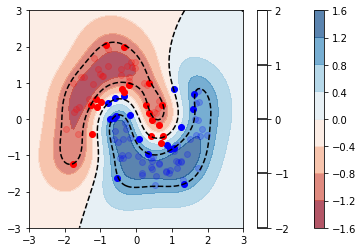

In [8]:
plot(1,1)

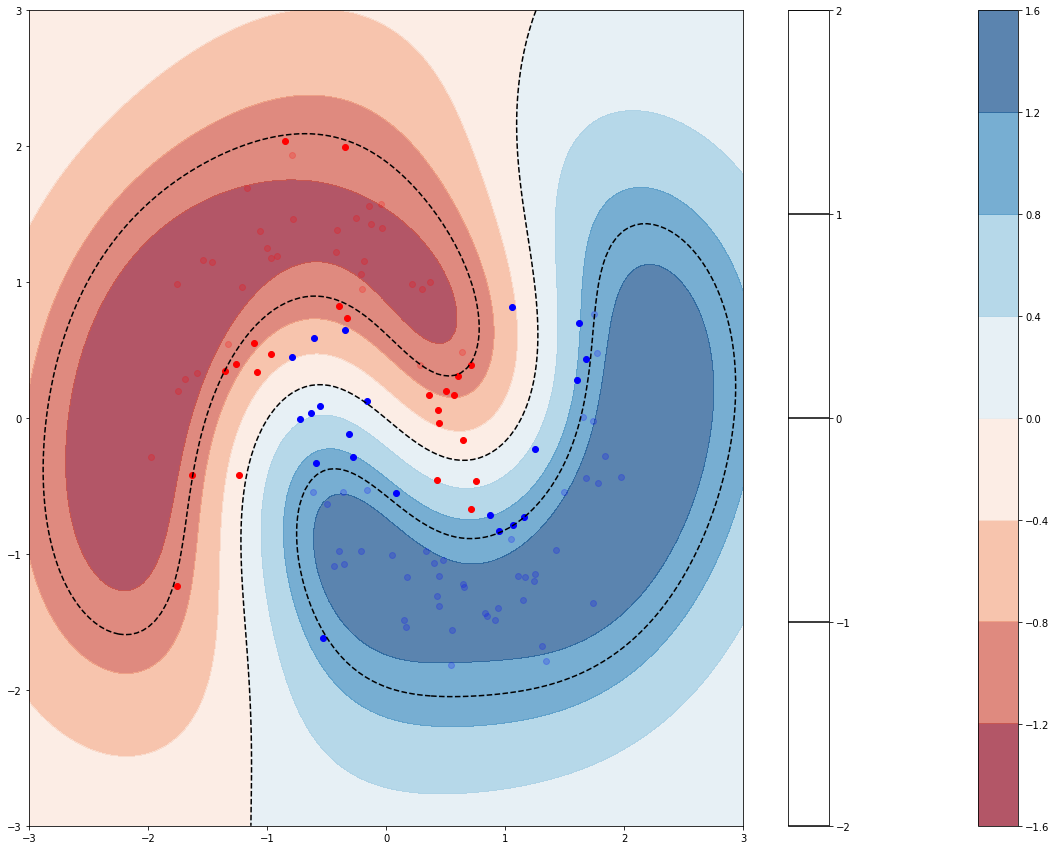

In [9]:
plot(1, 0.5)

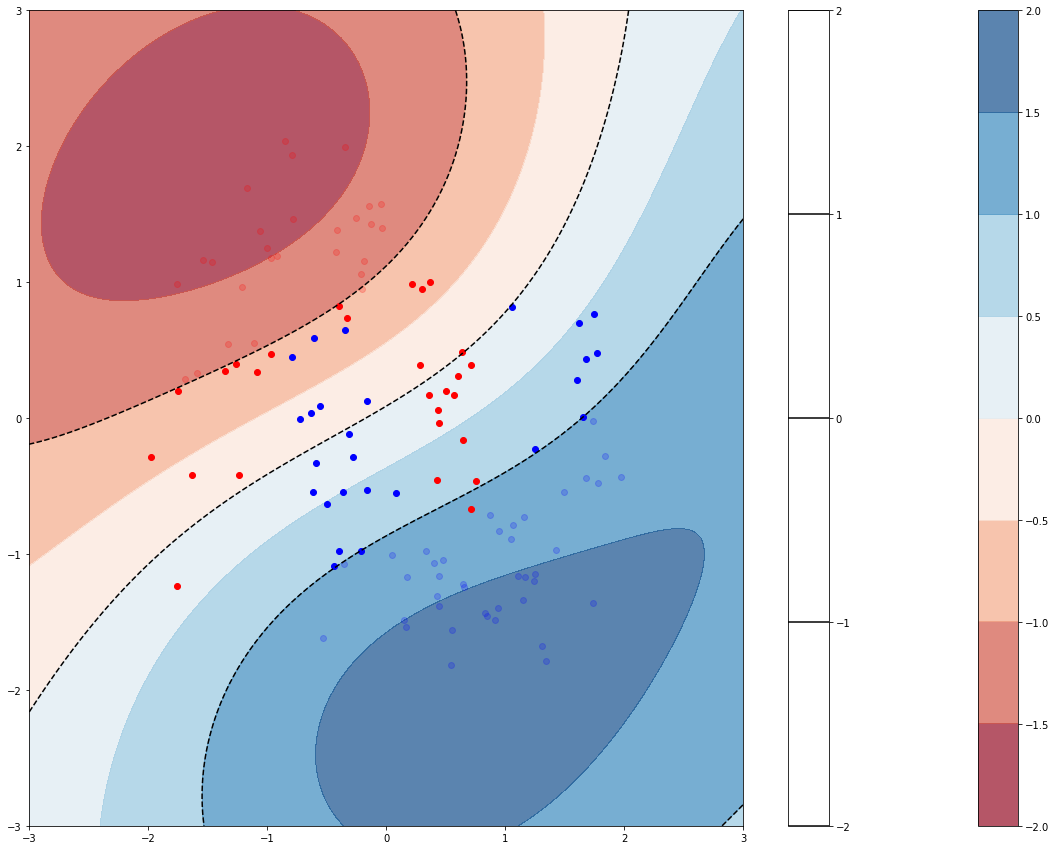

In [10]:
plot(1,0.1)

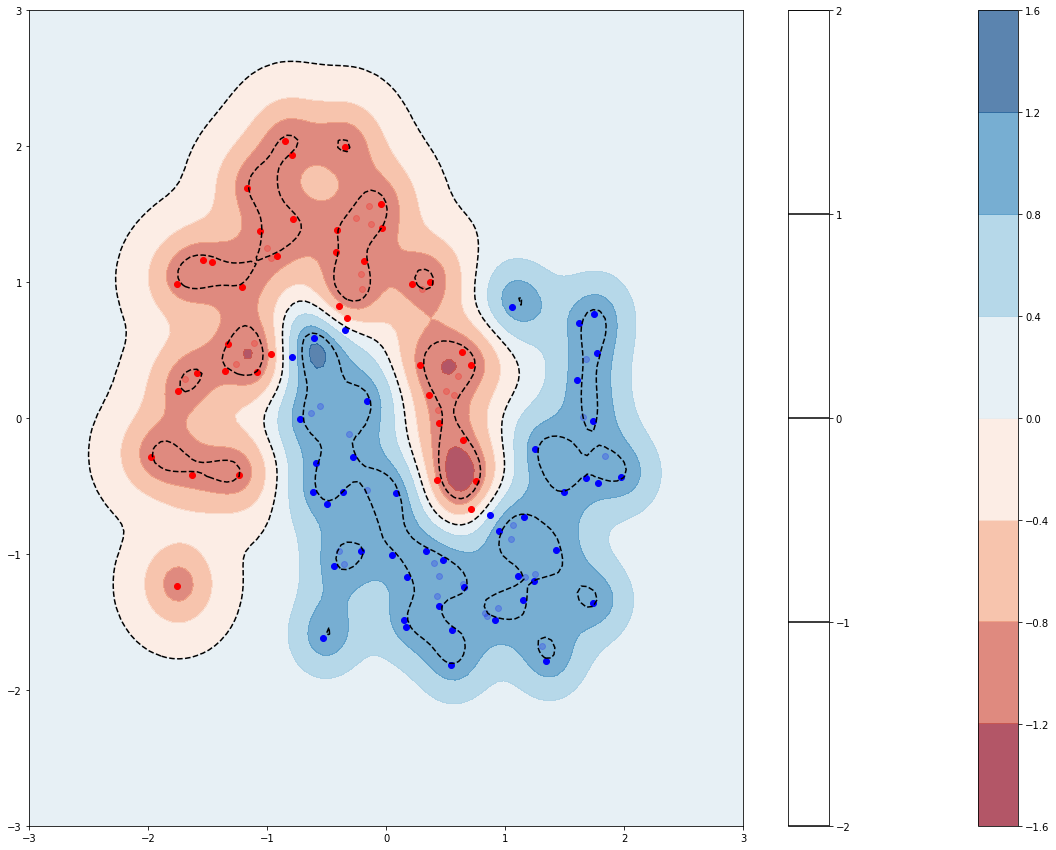

In [11]:
plot(1,10)

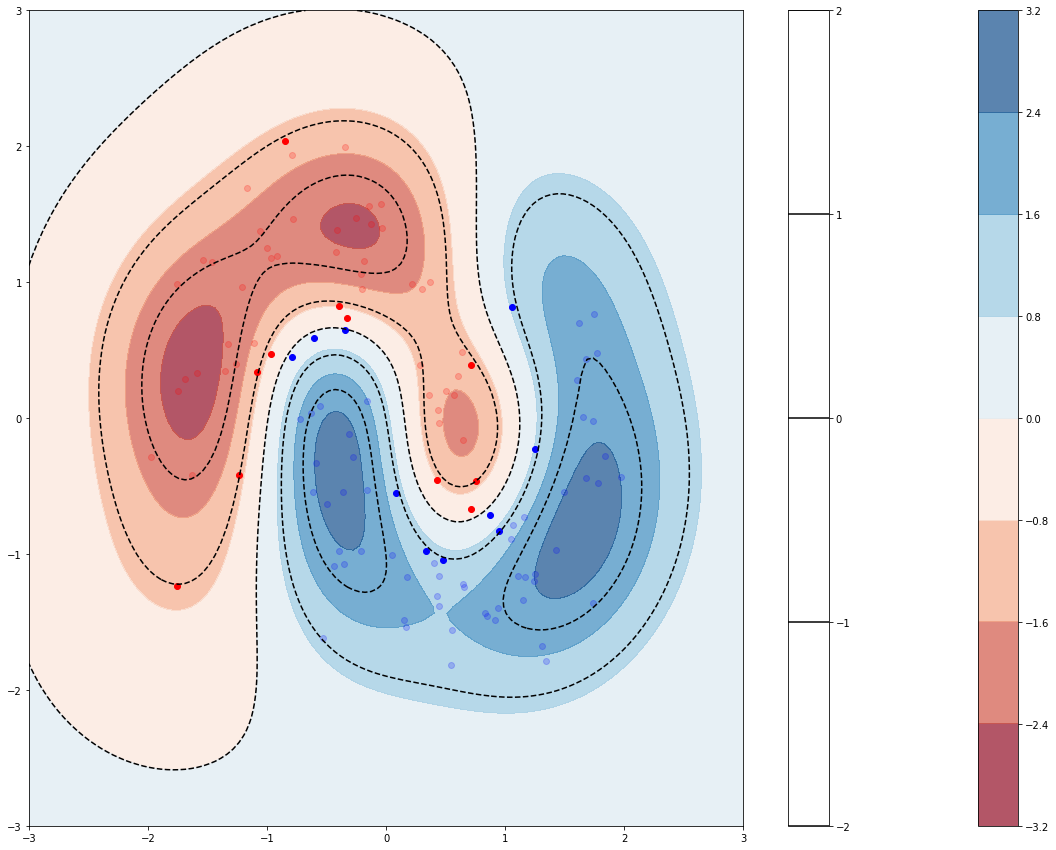

In [12]:
plot(10,1)

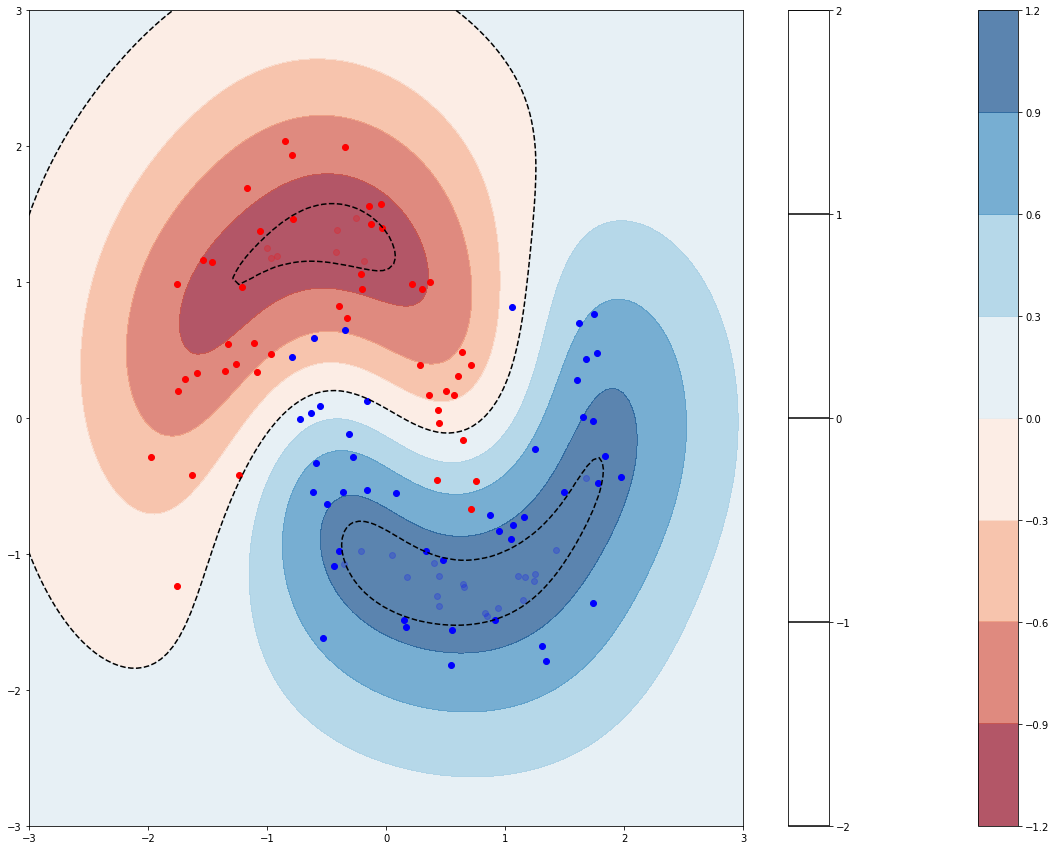

In [13]:
plot(0.1, 1)

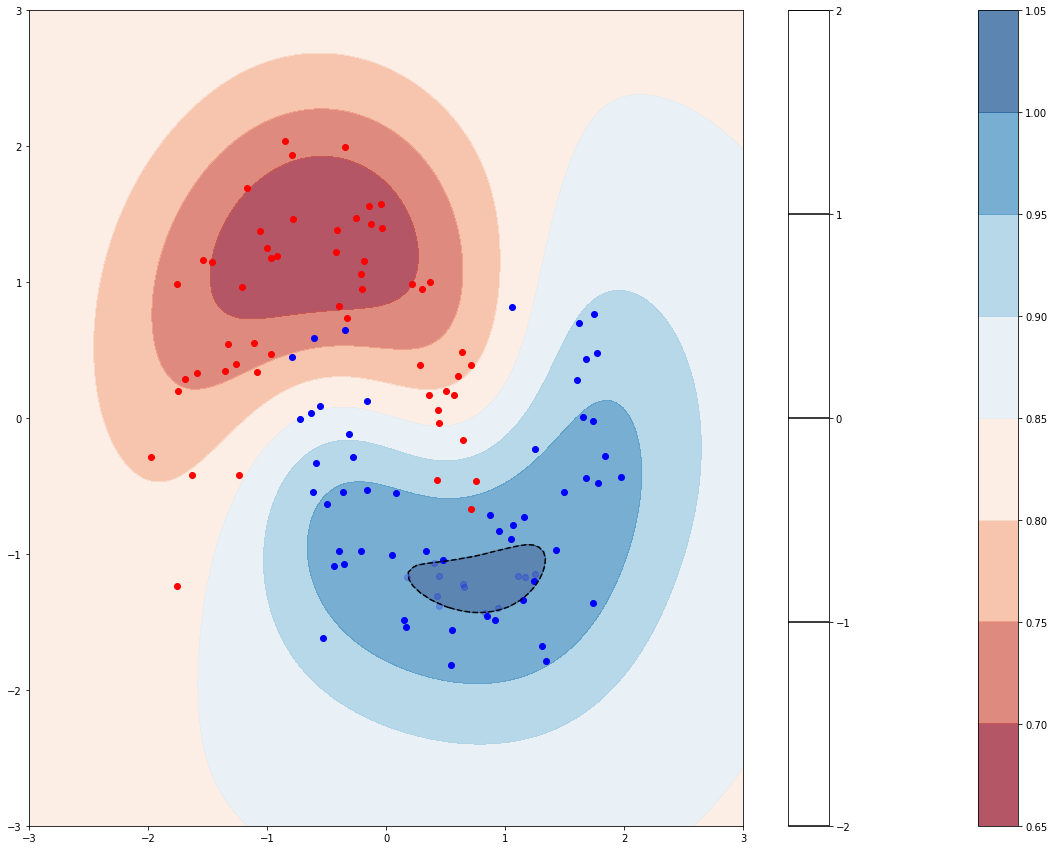

In [14]:
plot(0.01, 1)

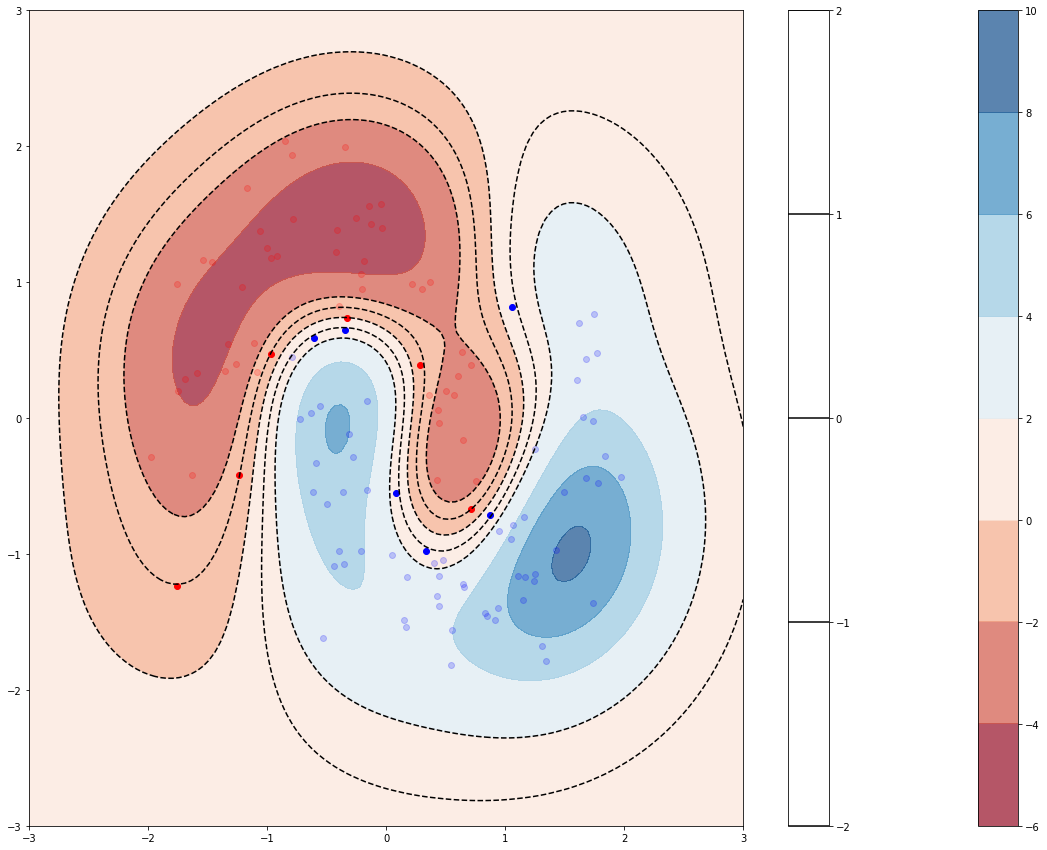

In [15]:
plot(100,1)